<a href="https://colab.research.google.com/github/BrainConnection/Small_Project/blob/main/IEC_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [1]:
!pip install scipy
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# LAB 1 Pre-Lab

In [ ]:
v = [
    -2.6, -2.55, -2.5, -2.45, -2.4, -2.35, -2.3, -2.25, -2.2, -2.15, -2.1, -2.05, -2.0, -1.95, -1.9, -1.85,
    -1.8, -1.75, -1.7, -1.65, -1.6, -1.55, -1.5, -1.45, -1.4, -1.35, -1.3, -1.25, -1.2, -1.15, -1.1, -1.05,
    -1.0, -0.95, -0.9, -0.85, -0.8, -0.75, -0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25,
    -0.2, -0.15, -0.1, -0.05, -9.575660e-16, 0.04999995, 0.09999979, 0.1499993, 0.1999979, 0.2499938, 0.2999811,
    0.3499431, 0.3998289, 0.4494884, 0.4984934, 0.5457439, 0.5890224, 0.6257302, 0.6549455, 0.6778334, 0.6961337,
    0.7113306, 0.724153, 0.735353, 0.7453533, 0.7544249, 0.7627627, 0.7705095, 0.7777715, 0.7846296, 0.7911468,
    0.7973724, 0.8033463, 0.8091009, 0.8146628, 0.820054, 0.8252932, 0.8303962, 0.8353765, 0.8402455, 0.8450135,
    0.8496892, 0.8542801, 0.8587933, 0.8632345, 0.8676093, 0.8719223, 0.8761778, 0.8803797, 0.8845316, 0.8886365,
    0.8926973, 0.8967167,]

In [ ]:
i = [
    -2.522599e-09, -2.522550e-09, -2.522499e-09, -2.522450e-09, -2.522400e-09, -2.522350e-09, -2.522300e-09, -2.522250e-09,
    -2.522200e-09, -2.522150e-09, -2.522100e-09, -2.522050e-09, -2.522000e-09, -2.521950e-09, -2.521900e-09, -2.521850e-09,
    -2.521800e-09, -2.521750e-09, -2.521700e-09, -2.521650e-09, -2.521600e-09, -2.521550e-09, -2.521500e-09, -2.521450e-09,
    -2.521400e-09, -2.521350e-09, -2.521300e-09, -2.521250e-09, -2.521200e-09, -2.521150e-09, -2.521100e-09, -2.521050e-09,
    -2.521000e-09, -2.520950e-09, -2.520900e-09, -2.520850e-09, -2.520800e-09, -2.520750e-09, -2.520699e-09, -2.520648e-09,
    -2.520596e-09, -2.520537e-09, -2.520459e-09, -2.520327e-09, -2.520030e-09, -2.519236e-09, -2.516941e-09, -2.510124e-09,
    -2.489676e-09, -2.428141e-09, -2.242756e-09, -1.684043e-09, -5.315848e-23, 5.076154e-09, 2.037718e-08, 6.649879e-08,
    2.055184e-07, 6.245149e-07, 1.887014e-06, 5.688111e-06, 1.710531e-05, 5.115822e-05, 1.506750e-04, 4.259480e-04,
    1.097759e-03, 2.427002e-03, 4.505521e-03, 7.216727e-03, 1.038665e-02, 1.387595e-02, 1.759018e-02, 2.146732e-02,
    2.546613e-02, 2.955840e-02, 3.372429e-02, 3.794942e-02, 4.222310e-02, 4.653721e-02, 5.088545e-02, 5.526286e-02,
    5.966544e-02, 6.408996e-02, 6.853376e-02, 7.299463e-02, 7.747070e-02, 8.196039e-02, 8.646237e-02, 9.097546e-02, 9.549866e-02, 1.000311e-01,
    1.045720e-01, 1.091207e-01, 1.136766e-01, 1.182391e-01, 1.228078e-01, 1.273822e-01, 1.319620e-01, 1.365469e-01,
    1.411363e-01, 1.457303e-01, 1.503283e-01,
]

In [ ]:
v = np.array(v)
i = np.array(i)

In [ ]:
len(i)

101

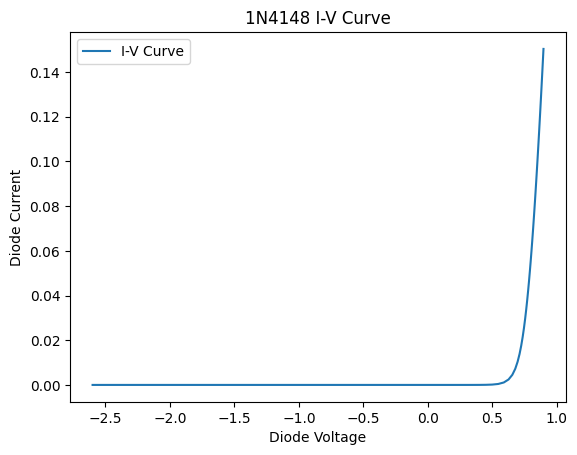

In [ ]:
plt.plot(v,i,label="I-V Curve")
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 I-V Curve")
plt.legend()

In [ ]:
def func(i, i_s, eta, rs):
  return np.log(i/i_s+1)*eta*0.025887 + rs*i

popt, pcov = curve_fit(func, i, v, p0 = [2.52e-09, 1.752, 0.568])

<ipython-input-59-9fa939965a21>:2: RuntimeWarning: invalid value encountered in log
  return np.log(i/i_s+1)*eta*0.025887 + rs*i
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
popt

array([2.520e-09, 1.752e+00, 5.680e-01])

In [ ]:
def fitted_i(i, v, i_s, eta, rs):
  return i_s*(np.exp((v-rs*i)/(eta*0.025887))-1)


def recursive_fitted_2(i, v, i_s, eta, rs):
  i_1 = fitted_i(i, v, i_s, eta, rs)

  return fitted_i(i_1, v, i_s, eta, rs)


def recursive_fitted_3(i, v, i_s, eta, rs):
  i_1 = fitted_i(i, v, i_s, eta, rs)
  i_2 = fitted_i(i_1, v, i_s, eta, rs)

  return fitted_i(i_2, v, i_s, eta, rs)

Text(0.5, 1.0, '1N4148 I-V Curve')

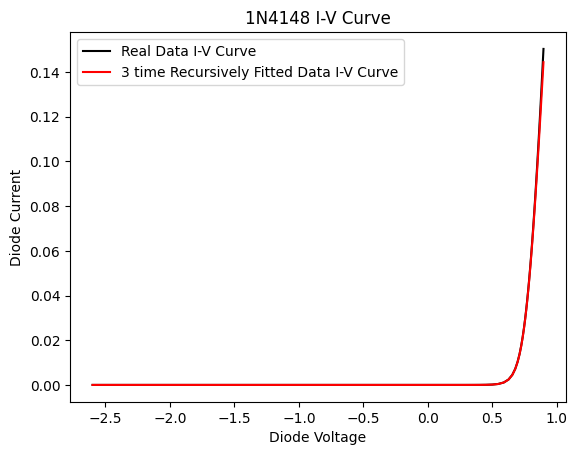

In [ ]:
plt.plot(v, i, label="Real Data I-V Curve", color="black")
plt.plot(v, recursive_fitted_3(i, v, 2.520e-09, 1.752e+00, 5.680e-01), label="3 time Recursively Fitted Data I-V Curve", color="red")
plt.legend()
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 I-V Curve")

(0.06, 0.15)

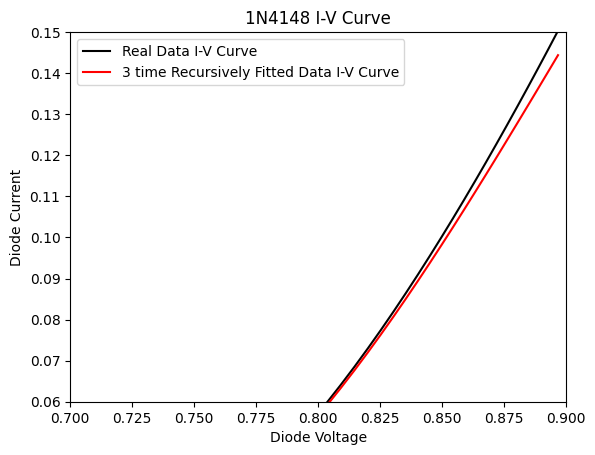

In [ ]:
plt.plot(v, i, label="Real Data I-V Curve", color="black")
plt.plot(v, recursive_fitted_3(i, v, 2.520e-09, 1.752e+00, 5.680e-01), label="3 time Recursively Fitted Data I-V Curve", color="red")
plt.legend()
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 I-V Curve")
plt.xlim(0.7,0.9)
plt.ylim(0.06,0.15)

In [ ]:
fit_1 = fitted_i(i, v, 2.520e-09, 1.752e+00, 5.680e-01)
fit_2 = recursive_fitted_2(i, v, 2.520e-09, 1.752e+00, 5.680e-01)
fit_3 = recursive_fitted_3(i, v, 2.520e-09, 1.752e+00, 5.680e-01)

In [ ]:
sum = 0
for num in range(101):
  sum = sum + (fit_1[num]-i[num])**2

MSE = np.sqrt(sum/101)

MSE

0.0007551037288783788

In [ ]:
sum = 0
for num in range(101):
  sum = sum + (fit_2[num]-i[num])**2

MSE = np.sqrt(sum/101)

MSE

0.0004305232813321303

In [ ]:
sum = 0
for num in range(101):
  sum = sum + np.abs(fit_3[num]-i[num])/i[num]

MSE = np.sqrt(sum/101)

MSE

0.08186873560537447

In [ ]:
v_2 = [
    -2.600000e+00, -2.550000e+00, -2.500000e+00, -2.450000e+00, -2.400000e+00, -2.350000e+00, -2.300000e+00,
    -2.250000e+00, -2.200000e+00, -2.150000e+00, -2.100000e+00, -2.050000e+00, -2.000000e+00, -1.950000e+00,
    -1.900000e+00, -1.850000e+00, -1.800000e+00, -1.750000e+00, -1.700000e+00, -1.650000e+00, -1.600000e+00,
    -1.550000e+00, -1.500000e+00, -1.450000e+00, -1.400000e+00, -1.350000e+00, -1.300000e+00, -1.250000e+00,
    -1.200000e+00, -1.150000e+00, -1.100000e+00, -1.050000e+00, -1.000000e+00, -9.500000e-01, -9.000000e-01,
    -8.500000e-01, -8.000000e-01, -7.500000e-01, -7.000000e-01, -6.500000e-01, -6.000000e-01, -5.500000e-01,
    -5.000000e-01, -4.500000e-01, -4.000000e-01, -3.500000e-01, -3.000000e-01, -2.500000e-01, -2.000000e-01,
    -1.500000e-01, -1.000000e-01, -5.000000e-02, -9.575660e-16, 4.999995e-02, 9.999979e-02, 1.499993e-01,
    1.999979e-01, 2.499938e-01, 2.999811e-01, 3.499431e-01, 3.998289e-01, 4.494884e-01, 4.984934e-01,
    5.457439e-01, 5.890224e-01, 6.257302e-01, 6.549455e-01, 6.778334e-01, 6.961337e-01, 7.113306e-01,
    7.241530e-01, 7.353530e-01, 7.453533e-01, 7.544249e-01, 7.627627e-01, 7.705095e-01, 7.777715e-01,
    7.846296e-01, 7.911468e-01, 7.973724e-01, 8.033463e-01, 8.091009e-01, 8.146628e-01, 8.200540e-01,
    8.252932e-01, 8.303962e-01, 8.353765e-01, 8.402455e-01, 8.450135e-01, 8.496892e-01, 8.542801e-01,
    8.587933e-01, 8.632345e-01, 8.676093e-01, 8.719223e-01, 8.761778e-01, 8.803797e-01, 8.845316e-01,
    8.886365e-01, 8.926973e-01, 8.967167e-01, 9.006971e-01, 9.046406e-01, 9.085492e-01, 9.124248e-01,
    9.162692e-01, 9.200839e-01, 9.238704e-01, 9.276300e-01, 9.313640e-01, 9.350736e-01, 9.387600e-01, 9.424240e-01]

In [ ]:
i_2 = [
    -2.522599e-09, -2.522550e-09, -2.522499e-09, -2.522450e-09, -2.522400e-09, -2.522350e-09, -2.522300e-09, -2.522250e-09,
    -2.522200e-09, -2.522150e-09, -2.522100e-09, -2.522050e-09, -2.522000e-09, -2.521950e-09, -2.521900e-09, -2.521850e-09,
    -2.521800e-09, -2.521750e-09, -2.521700e-09, -2.521650e-09, -2.521600e-09, -2.521550e-09, -2.521500e-09, -2.521450e-09,
    -2.521400e-09, -2.521350e-09, -2.521300e-09, -2.521250e-09, -2.521200e-09, -2.521150e-09, -2.521100e-09, -2.521050e-09,
    -2.521000e-09, -2.520950e-09, -2.520900e-09, -2.520850e-09, -2.520800e-09, -2.520750e-09, -2.520699e-09, -2.520648e-09,
    -2.520596e-09, -2.520537e-09, -2.520459e-09, -2.520327e-09, -2.520030e-09, -2.519236e-09, -2.516941e-09, -2.510124e-09,
    -2.489676e-09, -2.428141e-09, -2.242756e-09, -1.684043e-09, -5.315848e-23, 5.076154e-09, 2.037718e-08, 6.649879e-08,
    2.055184e-07, 6.245149e-07, 1.887014e-06, 5.688111e-06, 1.710531e-05, 5.115822e-05, 1.506750e-04, 4.259480e-04,
    1.097759e-03, 2.427002e-03, 4.505521e-03, 7.216727e-03, 1.038665e-02, 1.387595e-02, 1.759018e-02, 2.146732e-02,
    2.546613e-02, 2.955840e-02, 3.372429e-02, 3.794942e-02, 4.222310e-02, 4.653721e-02, 5.088545e-02, 5.526286e-02,
    5.966544e-02, 6.408996e-02, 6.853376e-02, 7.299463e-02, 7.747070e-02, 8.196039e-02, 8.646237e-02, 9.097546e-02,
    9.549866e-02, 1.000311e-01, 1.045720e-01, 1.091207e-01, 1.136766e-01, 1.182391e-01, 1.228078e-01, 1.273822e-01,
    1.319620e-01, 1.365469e-01, 1.411363e-01, 1.457303e-01, 1.503283e-01, 0.1549303, 0.1595359, 0.1641451, 0.1687575,
    0.1733731, 0.1779916, 0.182613, 0.187237, 0.1918636, 0.1964926,
    0.201124, 0.2057576
]

(0.06, 0.15)

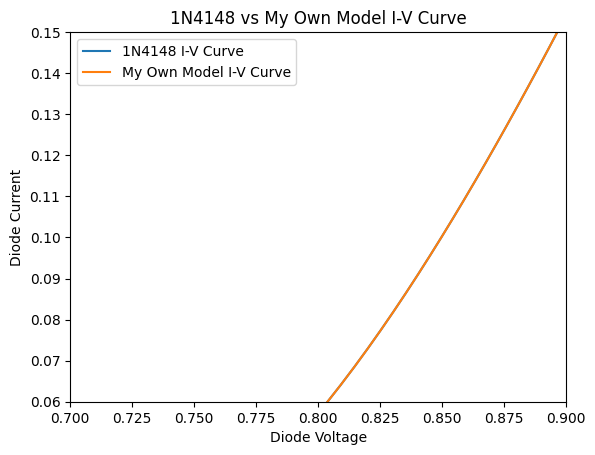

In [ ]:
plt.plot(v,i,label="1N4148 I-V Curve")
plt.plot(v_2, i_2, label="My Own Model I-V Curve")
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 vs My Own Model I-V Curve")
plt.legend()

plt.xlim(0.7,0.9)
plt.ylim(0.06,0.15)

In [ ]:
plt.plot(v,i,label="1N4148 I-V Curve")
plt.plot(v_2, i_2, label="My Own Model I-V Curve")
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 vs My Own Model I-V Curve")
plt.legend()

In [ ]:
sum = 0
for num in range(101):
  sum = sum + np.abs(i_2[num]-i[num])/i[num]

MSE = np.sqrt(sum/101)

MSE

0.0

# LAB 1 After-Lab

## I-V Characteristic

In [ ]:
v = [-2.4206, -2.1093, -1.8199, -1.5293, -1.2103, -0.9096, -0.6092, -0.3095, -0.007, 0.0995, 0.1992, 0.2994, 0.4096, 0.599, 0.7128, 0.8176, 0.8950, 0.9114, 0.9213, 0.9321, 0.9384]
v_in = [-2.4207, -2.1094, -1.82, -1.5294, -1.2104, -0.9097, -0.6093, -0.3096, 0, 0.0996, 0.1993, 0.2995, 0.4098, 0.6092, 0.8, 1.2, 1.8, 2.0993, 2.2997, 2.5392, 2.7193]
ohm = 9.94

i_temp = []
for i in range(21):
  i_temp.append((v_in[i]-v[i])/ohm)

v = np.array(v)
v_in = np.array(v_in)
i_temp = np.array(i_temp)

[-1.006036217305946e-05,
 -1.0060362173014783e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 0.0007042253521126761,
 1.0060362173037122e-05,
 1.0060362173039914e-05,
 1.0060362173037122e-05,
 2.0120724346074244e-05,
 0.001026156941649898,
 0.008772635814889343,
 0.03847082494969819,
 0.09104627766599599,
 0.11950704225352113,
 0.13867203219315896,
 0.1616800804828974,
 0.17916498993963784]

Text(0.5, 1.0, 'Diode Voltage - Supply Voltage Curve')

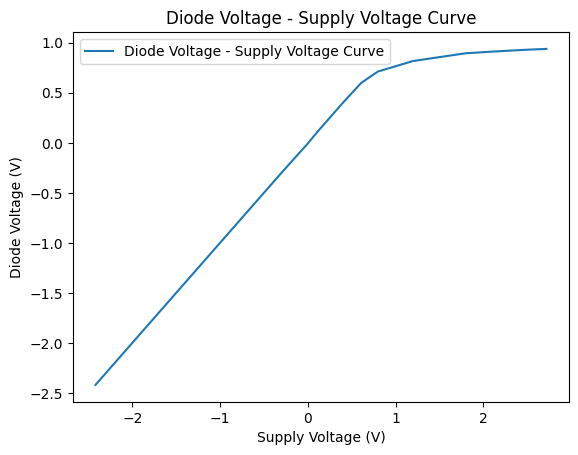

In [ ]:
plt.plot(v_in, v, label="Diode Voltage - Supply Voltage Curve")
plt.ylabel("Diode Voltage (V)")
plt.xlabel("Supply Voltage (V)")
plt.legend()
plt.title("Diode Voltage - Supply Voltage Curve")

Text(0.5, 1.0, 'Diode Current - Diode Voltage Curve')

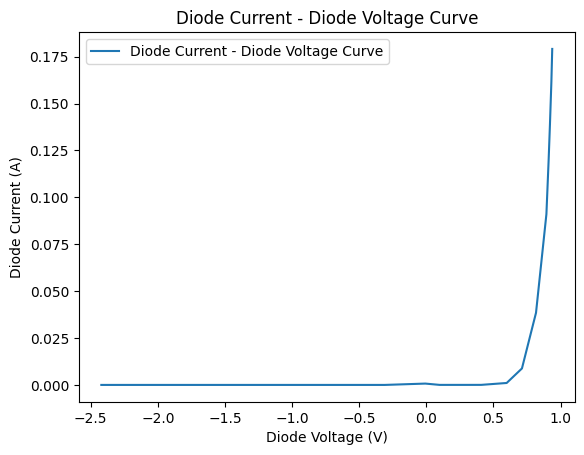

In [ ]:
plt.plot(v, i_temp, label="Diode Current - Diode Voltage Curve")
plt.ylabel("Diode Current (A)")
plt.xlabel("Diode Voltage (V)")
plt.legend()
plt.title("Diode Current - Diode Voltage Curve")

In [ ]:
def func(i, i_s, eta):
  return np.log(i/i_s+1)*eta*0.025887

popt, pcov = curve_fit(func, i_temp, v, p0 = [0.00005, 1.752])

<ipython-input-75-69165f280f62>:2: RuntimeWarning: invalid value encountered in log
  return np.log(i/i_s+1)*eta*0.025887


In [ ]:
popt

array([1.00603699e-05, 3.74295903e+00])

In [ ]:
def fitted_i(v, i_s, eta):
  return i_s*(np.exp(v/(eta*0.025887))-1)

fit_1 = fitted_i(v, 1.00603699e-05, 3.74295905e+00)

In [ ]:
fit_1

array([-1.00603699e-05, -1.00603699e-05, -1.00603698e-05, -1.00603685e-05,
       -1.00603321e-05, -1.00595273e-05, -1.00416596e-05, -9.64790696e-06,
       -7.01167962e-07,  1.80320421e-05,  6.85465071e-05,  2.11031685e-04,
        6.79396885e-04,  4.85881610e-03,  1.57478544e-02,  4.64659976e-02,
        1.03301422e-01,  1.22354610e-01,  1.35518069e-01,  1.51498367e-01,
        1.61676681e-01])

Text(0.5, 1.0, '1N4148 I-V Curve')

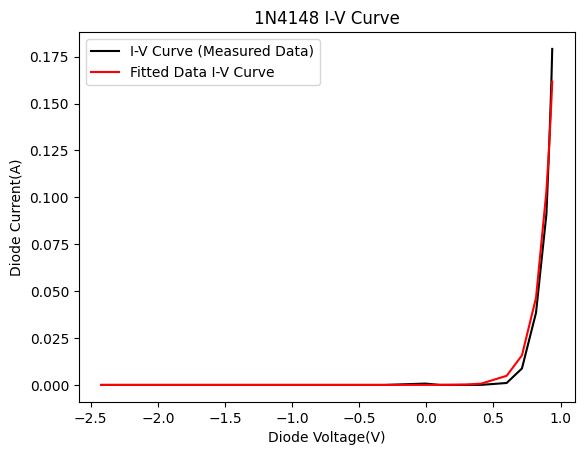

In [ ]:
plt.plot(v, i_temp, label="I-V Curve (Measured Data)", color="black")
plt.plot(v, fit_1, label="Fitted Data I-V Curve", color="red")
plt.legend()
plt.xlabel("Diode Voltage(V)")
plt.ylabel("Diode Current(A)")
plt.title("1N4148 I-V Curve")

In [ ]:
sum = 0
for num in range(21):
  sum = sum + (fit_1[num]-i_temp[num])**2

MSE = np.sqrt(sum/21)

MSE

0.005798169353789881

## DC Transfer Characteristics

0.7 0.09427

In [ ]:
v_in = [-2.5, -2.3, -2.1, -1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]
v_out = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.00001,0.00007,0.00024,0.00135,0.00952,0.03934,0.09427,0.16328,0.24013,0.32324,0.40412,0.4942,0.5813,0.6703,0.7619,0.8556,0.9479,1.0393,1.1324,1.225,1.3191,1.4139,1.5083,1.6027,1.6967]

v_in = np.array(v_in)
v_out = np.array(v_out)

Text(0.5, 1.0, 'DC Transfer Curve')

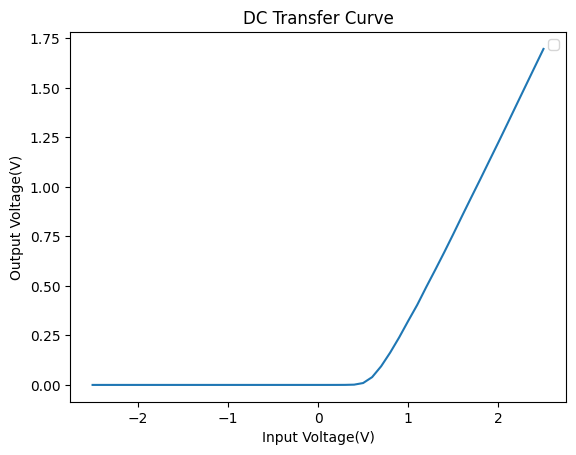

In [ ]:
plt.plot(v_in, v_out)
plt.legend()
plt.xlabel("Input Voltage(V)")
plt.ylabel("Output Voltage(V)")
plt.title("DC Transfer Curve")

In [ ]:
v_in = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]
v_out = [0.09427,0.16328,0.24013,0.32324,0.40412,0.4942,0.5813,0.6703,0.7619,0.8556,0.9479,1.0393,1.1324,1.225,1.3191,1.4139,1.5083,1.6027,1.6967]

In [ ]:
def func(v_in, a, b):
  return a*v_in + b

popt, pcov = curve_fit(func, v_in, v_out, p0 = [1, -0.7])

In [ ]:
popt

array([ 0.90234702, -0.57672154])

0.7 0.601

In [ ]:
v_in = [-2.5, -2.4, -2.3, -2.2, -2.1, -2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]
v_out = [-2.4975, -2.3981, -2.2981, -2.1972, -2.0962, -1.9961, -1.8967, -1.7962, -1.6971, -1.5967, -1.4958, -1.3965, -1.2969, -1.1974, -1.0968, -0.9972, -0.8971, -0.7981, -0.6983, -0.5968, -0.4969, -0.39675, -0.29712, -0.1973, -0.0968, -0.00145, 0.09703, 0.1973, 0.2972, 0.3957, 0.4878, 0.5569, 0.601, 0.6294, 0.6501, 0.6662, 0.6799, 0.6911, 0.701, 0.7097, 0.7176, 0.725, 0.7318, 0.7381, 0.7436, 0.7491, 0.7546, 0.7596, 0.7638, 0.768, 0.7735]

v_in = np.array(v_in)
v_out = np.array(v_out)

Text(0.5, 1.0, 'DC Transfer Curve')

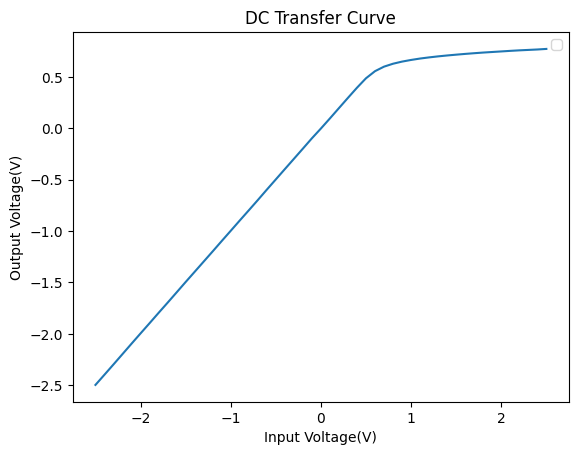

In [ ]:
plt.plot(v_in, v_out)
plt.legend()
plt.xlabel("Input Voltage(V)")
plt.ylabel("Output Voltage(V)")
plt.title("DC Transfer Curve")

In [ ]:
v_in = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]
v_out = [0.601, 0.6294, 0.6501, 0.6662, 0.6799, 0.6911, 0.701, 0.7097, 0.7176, 0.725, 0.7318, 0.7381, 0.7436, 0.7491, 0.7546, 0.7596, 0.7638, 0.768, 0.7735]

In [ ]:
def func(v_in, a, b):
  return a*v_in + b

popt, pcov = curve_fit(func, v_in, v_out, p0 = [0.1, 0.3])

In [ ]:
popt

array([0.08459474, 0.57796947])

In [ ]:
v_in = [-2.5, -2.4, -2.3, -2.2, -2.1, -2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
v_out = [-2.4975, -2.3981, -2.2981, -2.1972, -2.0962, -1.9961, -1.8967, -1.7962, -1.6971, -1.5967, -1.4958, -1.3965, -1.2969, -1.1974, -1.0968, -0.9972, -0.8971, -0.7981, -0.6983, -0.5968, -0.4969, -0.39675, -0.29712, -0.1973, -0.0968, -0.00145, 0.09703, 0.1973, 0.2972, 0.3957, 0.4878, 0.5569, 0.601]

In [ ]:
def func(v_in, a, b):
  return a*v_in + b

popt, pcov = curve_fit(func, v_in, v_out, p0 = [0.1, 0.3])

In [ ]:
popt

array([ 0.99042941, -0.01146777])

In [ ]:
v_in = [-2.5, -2.4, -2.3, -2.2, -2.1, -2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]
v_out = [-2.4975, -2.3981, -2.2981, -2.1972, -2.0962, -1.9961, -1.8967, -1.7962, -1.6971, -1.5967, -1.4958, -1.3965, -1.2969, -1.1974, -1.0968, -0.9972, -0.8971, -0.7981, -0.6983, -0.5968, -0.4969, -0.39675, -0.29712, -0.1973, -0.0968, -0.00145, 0.09703, 0.1973, 0.2972, 0.3957, 0.4878, 0.5569, 0.601, 0.6294, 0.6501, 0.6662, 0.6799, 0.6911, 0.701, 0.7097, 0.7176, 0.725, 0.7318, 0.7381, 0.7436, 0.7491, 0.7546, 0.7596, 0.7638, 0.768, 0.7735]

v_in = np.array(v_in)
v_out = np.array(v_out)

In [ ]:
data = """
-2.500000000000000e+00	-2.499900e+00
-2.400000000000000e+00	-2.399900e+00
-2.300000000000000e+00	-2.299900e+00
-2.200000000000000e+00	-2.199900e+00
-2.100000000000000e+00	-2.099900e+00
-2.000000000000000e+00	-1.999900e+00
-1.899999999999999e+00	-1.899900e+00
-1.799999999999999e+00	-1.799900e+00
-1.699999999999999e+00	-1.699900e+00
-1.599999999999999e+00	-1.599900e+00
-1.499999999999999e+00	-1.499900e+00
-1.399999999999999e+00	-1.399900e+00
-1.299999999999999e+00	-1.299900e+00
-1.199999999999999e+00	-1.199900e+00
-1.099999999999999e+00	-1.099900e+00
-9.999999999999988e-01	-9.999000e-01
-8.999999999999988e-01	-8.999000e-01
-7.999999999999988e-01	-7.999001e-01
-6.999999999999988e-01	-6.999001e-01
-5.999999999999989e-01	-5.999002e-01
-4.999999999999989e-01	-4.999006e-01
-3.999999999999989e-01	-3.999016e-01
-2.999999999999989e-01	-2.999045e-01
-1.999999999999989e-01	-1.999127e-01
-9.999999999999892e-02	-9.993562e-02
1.082467449009528e-15	9.156755e-12
1.000000000000011e-01	9.981959e-02
2.000000000000011e-01	1.993163e-01
3.000000000000011e-01	2.979299e-01
4.000000000000011e-01	3.942333e-01
5.000000000000011e-01	4.850982e-01
6.000000000000011e-01	5.656320e-01
7.000000000000011e-01	6.318167e-01
8.000000000000010e-01	6.835655e-01
9.000000000000010e-01	7.236997e-01
1.000000000000001e+00	7.553879e-01
1.100000000000001e+00	7.812063e-01
1.200000000000001e+00	8.024888e-01
1.300000000000001e+00	8.205693e-01
1.400000000000001e+00	8.362307e-01
1.500000000000002e+00	8.499960e-01
1.600000000000002e+00	8.622467e-01
1.700000000000002e+00	8.732656e-01
1.800000000000002e+00	8.832658e-01
1.900000000000002e+00	8.924116e-01
2.000000000000002e+00	9.008318e-01
2.100000000000002e+00	9.086287e-01
2.200000000000002e+00	9.158851e-01
2.300000000000002e+00	9.226686e-01
2.400000000000002e+00	9.290352e-01
2.500000000000000e+00	9.350318e-01
"""

# Split the data into lines
lines = data.strip().split('\n')

# Extract the second value from each line and convert to float
v_in_simul = [float(line.split()[0]) for line in lines]
v_out_simul = [float(line.split()[1]) for line in lines]

Text(0.5, 1.0, 'DC Transfer Curve')

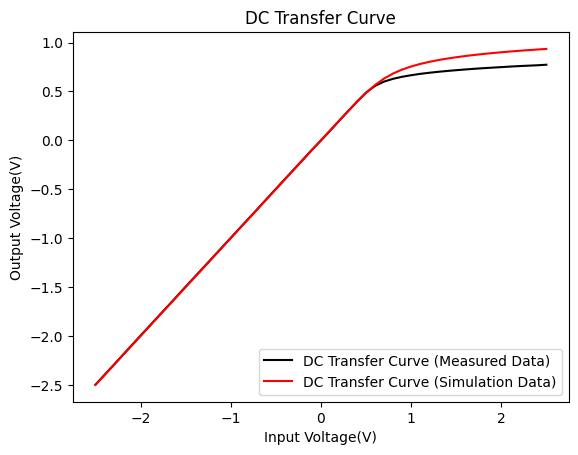

In [ ]:
plt.plot(v_in, v_out, label="DC Transfer Curve (Measured Data)", color="black")
plt.plot(v_in_simul, v_out_simul, label="DC Transfer Curve (Simulation Data)", color="red")
plt.legend()
plt.xlabel("Input Voltage(V)")
plt.ylabel("Output Voltage(V)")
plt.title("DC Transfer Curve")

In [ ]:
sum = 0
for num in range(51):
  sum = sum + (v_out_simul[num]-v_out[num])**2

MSE = np.sqrt(sum/51)

MSE

0.07903605320394635

In [ ]:
v_in = [-2.5, -2.3, -2.1, -1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]
v_out = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.00001,0.00007,0.00024,0.00135,0.00952,0.03934,0.09427,0.16328,0.24013,0.32324,0.40412,0.4942,0.5813,0.6703,0.7619,0.8556,0.9479,1.0393,1.1324,1.225,1.3191,1.4139,1.5083,1.6027,1.6967]

In [ ]:
data = """
-2.500000000000000e+00	-1.000001e-04
-2.400000000000000e+00	-1.000001e-04
-2.300000000000000e+00	-1.000001e-04
-2.200000000000000e+00	-1.000001e-04
-2.100000000000000e+00	-1.000001e-04
-2.000000000000000e+00	-1.000001e-04
-1.899999999999999e+00	-1.000001e-04
-1.799999999999999e+00	-1.000001e-04
-1.699999999999999e+00	-1.000001e-04
-1.599999999999999e+00	-1.000001e-04
-1.499999999999999e+00	-1.000001e-04
-1.399999999999999e+00	-1.000000e-04
-1.299999999999999e+00	-9.999994e-05
-1.199999999999999e+00	-9.999968e-05
-1.099999999999999e+00	-9.999892e-05
-9.999999999999988e-01	-9.999682e-05
-8.999999999999988e-01	-9.999090e-05
-7.999999999999988e-01	-9.997428e-05
-6.999999999999988e-01	-9.992759e-05
-5.999999999999989e-01	-9.979645e-05
-4.999999999999989e-01	-9.942801e-05
-3.999999999999989e-01	-9.839296e-05
-2.999999999999989e-01	-9.548532e-05
-1.999999999999989e-01	-8.731785e-05
-9.999999999999892e-02	-6.438032e-05
1.082467449009528e-15	-9.155673e-12
1.000000000000011e-01	1.804070e-04
2.000000000000011e-01	6.836596e-04
3.000000000000011e-01	2.070152e-03
4.000000000000011e-01	5.766755e-03
5.000000000000011e-01	1.490177e-02
6.000000000000011e-01	3.436793e-02
7.000000000000011e-01	6.818325e-02
8.000000000000010e-01	1.164345e-01
9.000000000000010e-01	1.763003e-01
1.000000000000001e+00	2.446121e-01
1.100000000000001e+00	3.187937e-01
1.200000000000001e+00	3.975112e-01
1.300000000000001e+00	4.794308e-01
1.400000000000001e+00	5.637693e-01
1.500000000000002e+00	6.500040e-01
1.600000000000002e+00	7.377533e-01
1.700000000000002e+00	8.267345e-01
1.800000000000002e+00	9.167342e-01
1.900000000000002e+00	1.007588e+00
2.000000000000002e+00	1.099168e+00
2.100000000000002e+00	1.191371e+00
2.200000000000002e+00	1.284115e+00
2.300000000000002e+00	1.377331e+00
2.400000000000002e+00	1.470965e+00
2.500000000000000e+00	1.564968e+00

"""

# Split the data into lines
lines = data.strip().split('\n')

# Extract the second value from each line and convert to float
v_in_simul = [float(line.split()[0]) for line in lines]
v_out_simul = [float(line.split()[1]) for line in lines]

Text(0.5, 1.0, 'DC Transfer Curve')

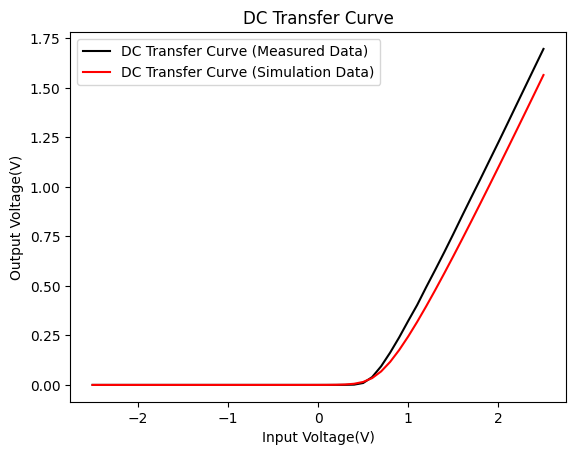

In [ ]:
plt.plot(v_in, v_out, label="DC Transfer Curve (Measured Data)", color="black")
plt.plot(v_in_simul, v_out_simul, label="DC Transfer Curve (Simulation Data)", color="red")
plt.legend()
plt.xlabel("Input Voltage(V)")
plt.ylabel("Output Voltage(V)")
plt.title("DC Transfer Curve")

In [ ]:
v_out = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00001,0.00007,0.00024,0.00135,0.00952,0.03934,0.09427,0.16328,0.24013,0.32324,0.40412,0.4942,0.5813,0.6703,0.7619,0.8556,0.9479,1.0393,1.1324,1.225,1.3191,1.4139,1.5083,1.6027,1.6967]

In [ ]:
sum = 0
for num in range(51):
  sum = sum + (v_out_simul[num]-v_out[num])**2

MSE = np.sqrt(sum/51)

MSE

1.0786284929665926

# LAB 3 After-Lab

## I-V Characteristic

In [93]:
vbe = [0.349, 0.3702, 0.3896, 0.4098, 0.42901, 0.4497, 0.4693, 0.4897, 0.5092, 0.5294, 0.5496, 0.5693, 0.5895, 0.5996, 0.6096, 0.6189, 0.6288, 0.6386, 0.6482, 0.6572, 0.6624, 0.6781, 0.6802, 0.6888, 0.6964, 0.7032, 0.7091]
ic = [0.01, 0.04, 0.08, 0.19, 0.42, 0.91, 1.96, 4.31, 9.21, 20.16, 44.39, 95.18, 208.01, 307.03, 455.71, 654.9, 964.2, 1417.4, 2077.4, 3959.2, 5064.9, 10570.4, 12450, 15278, 19337, 24729, 31691]

vbe_trunc = [0.5294, 0.5496, 0.5693, 0.5895, 0.5996, 0.6096, 0.6189, 0.6288, 0.6386, 0.6482, 0.6572, 0.6624]
ic_trunc_1 = [20.16, 44.39, 95.18, 208.01, 307.03, 455.71, 654.9, 964.2, 1417.4, 2077.4, 3959.2, 5064.9]

ic_trunc_2 = [1417.4, 2077.4, 3959.2, 5064.9, 10570.4, 12450, 15278, 19337, 24729, 31691]
ib = [-10.2354, 51.177, 102.3541, 184.2375, 317.2979, 818.8332, 982.5998, 1248.721, 1586.489, 2016.377]

In [94]:
vce = [0.0201, 0.0212, 0.0224, 0.023, 0.0242, 0.0252, 0.0264, 0.027, 0.0281, 0.0292, 0.0303, 0.0315, 0.032, 0.0343, 0.0365, 0.037, 0.0393, 0.0416, 0.0443, 0.0466, 0.0512, 0.0584, 0.0612, 0.0663, 0.0697, 0.0708, 0.0725, 0.0748, 0.0776, 0.0799, 0.0815, 0.0837, 0.0855, 0.0878, 0.0899, 0.0939, 0.1001, 0.1029, 0.1147, 0.1447, 0.1649, 0.2657, 0.3653, 0.4654, 0.5654, 0.6663, 0.7661, 0.8663, 0.9655, 1.066, 1.1659, 1.2668, 1.4659, 1.566, 1.6661, 1.7662, 2.2666, 2.3667, 2.4671, 2.5661, 2.7664]
ice = [5.28, 12.39, 18.19, 21.61, 27.54, 34.49, 41.13, 43.57, 49.73, 56.53, 62.85, 68.95, 72.45, 83.76, 96.43, 99.17, 111.54, 123.96, 139.14, 150.31, 174.23, 213.48, 227.76, 253.51, 268.36, 273.13, 281.75, 287.63, 306.43, 316.74, 324.31, 336.12, 356.7, 372.17, 380.14, 383.21, 420.15, 509.5, 543.6, 601.7, 684.5, 810.8, 816.4, 819.5, 824.3, 826.4, 828.2, 830.3, 832.8, 836.8, 838.2, 839, 840.9, 841.2, 842.3, 854.1, 847.2, 852.6, 862.6, 880.1, 929.4]

vce_trunc = [1.1659, 1.2668, 1.4659, 1.566, 1.6661, 1.7662]
ice_trunc = [838.2, 839, 840.9, 841.2, 842.3, 854.1]

In [95]:
vbe = np.array(vbe)
ic = np.array(ic)/1000000

vbe_trunc = np.array(vbe_trunc)
ic_trunc_1 = np.array(ic_trunc_1)/1000000

ic_trunc_2 = np.array(ic_trunc_2)/1000000
ib = np.array(ib)/1000000

vce = np.array(vce)
ice = np.array(ice)/1000000

vce_trunc = np.array(vce_trunc)
ice_trunc = np.array(ice_trunc)/1000000

Text(0.5, 1.0, 'Collector Current - Base-Emitter Voltage Curve')

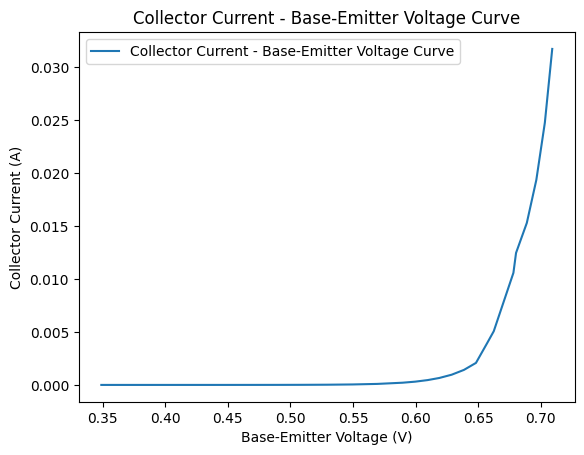

In [96]:
plt.plot(vbe, ic, label="Collector Current - Base-Emitter Voltage Curve")
plt.ylabel("Collector Current (A)")
plt.xlabel("Base-Emitter Voltage (V)")
plt.legend()
plt.title("Collector Current - Base-Emitter Voltage Curve")

Text(0.5, 1.0, 'Collector Current - Base Current Curve')

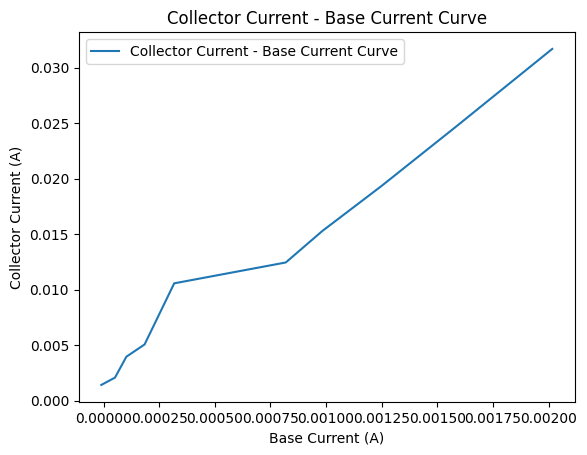

In [97]:
plt.plot(ib, ic_trunc_2, label="Collector Current - Base Current Curve")
plt.ylabel("Collector Current (A)")
plt.xlabel("Base Current (A)")
plt.legend()
plt.title("Collector Current - Base Current Curve")

Text(0.5, 1.0, 'Collector Current - Collector-Emitter Voltage Curve')

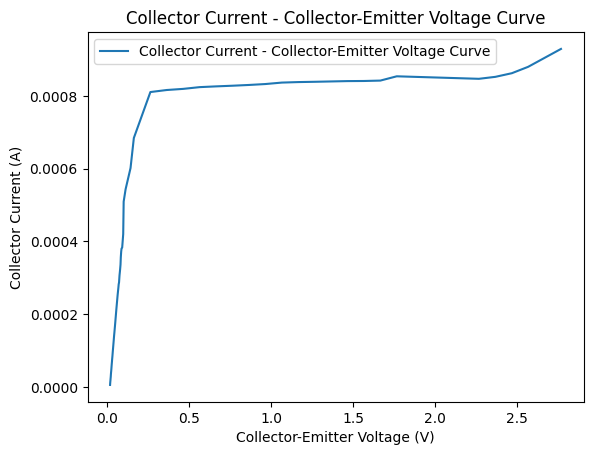

In [98]:
plt.plot(vce, ice, label="Collector Current - Collector-Emitter Voltage Curve")
plt.ylabel("Collector Current (A)")
plt.xlabel("Collector-Emitter Voltage (V)")
plt.legend()
plt.title("Collector Current - Collector-Emitter Voltage Curve")

## Fitting

In [108]:
def iseta(v_be, b):
  return -31.32 + b*v_be

popt, pcov = curve_fit(iseta, vbe_trunc, np.log(ic_trunc_1), p0 = [1/0.026])

In [109]:
popt

array([38.8593906])

Text(0.5, 1.0, 'Collector Current - Base-Emitter Voltage Curve')

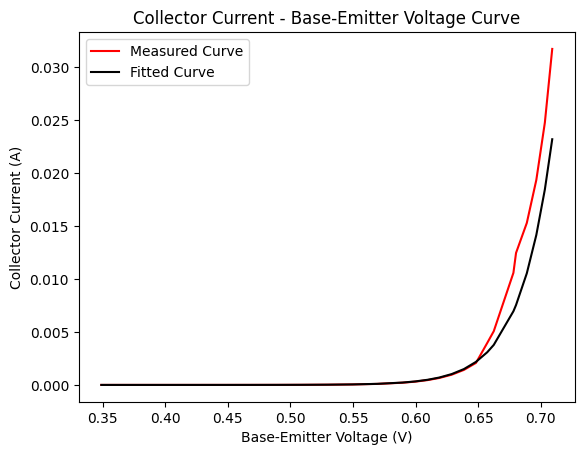

In [110]:
plt.plot(vbe, ic, label="Measured Curve", color="red")
plt.plot(vbe, np.exp(-31.32)*np.exp(38.8593906*vbe), label="Fitted Curve", color="black")
plt.ylabel("Collector Current (A)")
plt.xlabel("Base-Emitter Voltage (V)")
plt.legend()
plt.title("Collector Current - Base-Emitter Voltage Curve")

In [76]:
def beta(i_b, beta):
  return i_b*beta

popt, pcov = curve_fit(beta, ib, ic_trunc_2, p0 = [10])

In [77]:
popt

array([15.84456398])

Text(0.5, 1.0, 'Collector Current - Base Current Curve')

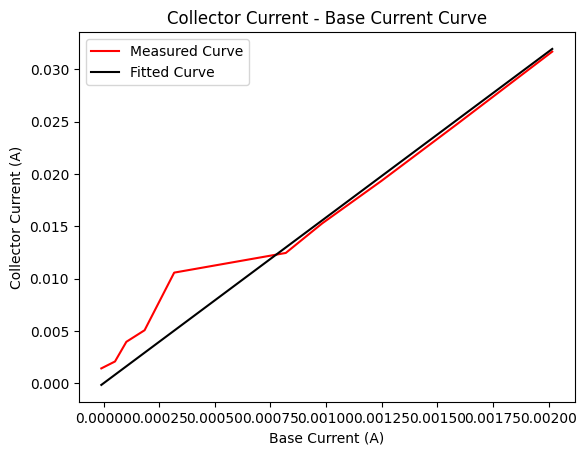

In [78]:
plt.plot(ib, ic_trunc_2, label="Measured Curve", color="red")
plt.plot(ib, 15.845*ib, label="Fitted Curve", color="black")
plt.ylabel("Collector Current (A)")
plt.xlabel("Base Current (A)")
plt.legend()
plt.title("Collector Current - Base Current Curve")

In [79]:
def va(v_ce, ico, va):
  return ico*(1+v_ce/va)

popt, pcov = curve_fit(va, vce_trunc, ice_trunc, p0 = [0.0008, 100])

In [80]:
popt

array([8.13379197e-04, 4.12515948e+01])

Text(0.5, 1.0, 'Collector Current - Collector-Emitter Voltage Curve')

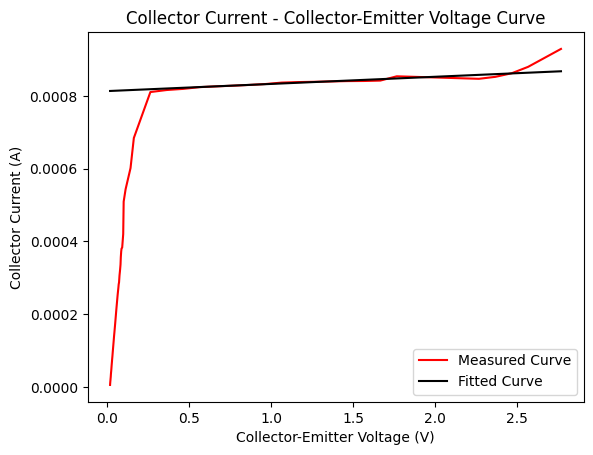

In [81]:
plt.plot(vce, ice, label="Measured Curve", color="red")
plt.plot(vce, 0.000813379*(1+vce/41.2515), label="Fitted Curve", color="black")
plt.ylabel("Collector Current (A)")
plt.xlabel("Collector-Emitter Voltage (V)")
plt.legend()
plt.title("Collector Current - Collector-Emitter Voltage Curve")

## DC Transfer Characteristics

$I_S$ = 1.02285e-14

$η$ = 0.949886

$\beta$ = 15.8446

$V_A$ = 40.4777

In [111]:
data = """
3.000000000000000e-01	1.655190e-10	-2.796815e-09
3.100000000000001e-01	2.445734e-10	-4.114911e-09
3.200000000000001e-01	3.609321e-10	-6.054709e-09
3.300000000000001e-01	5.322031e-10	-8.909442e-09
3.400000000000001e-01	7.843047e-10	-1.311065e-08
3.500000000000001e-01	1.155389e-09	-1.929342e-08
3.600000000000001e-01	1.701617e-09	-2.839238e-08
3.700000000000001e-01	2.505656e-09	-4.178296e-08
3.800000000000001e-01	3.689193e-09	-6.148939e-08
3.900000000000001e-01	5.431350e-09	-9.049057e-08
4.000000000000001e-01	7.995795e-09	-1.331705e-07
4.100000000000001e-01	1.177065e-08	-1.959807e-07
4.200000000000002e-01	1.732721e-08	-2.884159e-07
4.300000000000002e-01	2.550643e-08	-4.244485e-07
4.400000000000002e-01	3.754615e-08	-6.246411e-07
4.500000000000002e-01	5.526844e-08	-9.192537e-07
4.600000000000002e-01	8.135526e-08	-1.352817e-06
4.700000000000002e-01	1.197542e-07	-1.990859e-06
4.800000000000002e-01	1.762754e-07	-2.929809e-06
4.900000000000002e-01	2.594704e-07	-4.311552e-06
5.000000000000002e-01	3.819241e-07	-6.344854e-06
5.100000000000002e-01	5.621556e-07	-9.336844e-06
5.200000000000002e-01	8.274122e-07	-1.373930e-05
5.300000000000002e-01	1.217774e-06	-2.021662e-05
5.400000000000003e-01	1.792177e-06	-2.974557e-05
5.500000000000003e-01	2.637248e-06	-4.376145e-05
5.600000000000003e-01	3.880214e-06	-6.437184e-05
5.700000000000003e-01	5.707742e-06	-9.466822e-05
5.800000000000003e-01	8.393291e-06	-1.391784e-04
5.900000000000003e-01	1.233655e-05	-2.045188e-04
6.000000000000003e-01	1.811981e-05	-3.003259e-04
6.100000000000003e-01	2.658722e-05	-4.405675e-04
6.200000000000003e-01	3.895403e-05	-6.453462e-04
6.300000000000003e-01	5.695186e-05	-9.432999e-04
6.400000000000003e-01	8.301189e-05	-1.374627e-03
6.500000000000004e-01	1.204761e-04	-1.994575e-03
6.600000000000004e-01	1.738031e-04	-2.876835e-03
6.700000000000004e-01	2.486984e-04	-4.115693e-03
6.800000000000004e-01	3.520584e-04	-5.825098e-03
6.900000000000004e-01	4.916042e-04	-8.132596e-03
7.000000000000001e-01	6.751426e-04	-1.116709e-02
"""

# Split the data into lines
lines = data.strip().split('\n')

# Extract the second value from each line and convert to float
vbe_simul = np.array([float(line.split()[0]) for line in lines])
ib_simul = np.array([float(line.split()[1]) for line in lines])
ic_simul = np.array([-float(line.split()[2]) for line in lines])

In [112]:
data = """
0.000000000000000e+00	6.638767e-04
1.000000000000000e-02	2.581226e-04
2.000000000000000e-02	-5.163247e-05
3.000000000000000e-02	-2.817508e-04
4.000000000000000e-02	-4.488699e-04
5.000000000000000e-02	-5.680774e-04
6.000000000000000e-02	-6.519628e-04
7.000000000000001e-02	-7.104139e-04
8.000000000000000e-02	-7.508650e-04
9.000000000000000e-02	-7.787346e-04
9.999999999999999e-02	-7.978871e-04
1.100000000000000e-01	-8.110366e-04
1.200000000000000e-01	-8.200699e-04
1.300000000000000e-01	-8.262887e-04
1.400000000000000e-01	-8.305872e-04
1.500000000000000e-01	-8.335770e-04
1.600000000000000e-01	-8.356759e-04
1.700000000000000e-01	-8.371687e-04
1.800000000000000e-01	-8.382493e-04
1.900000000000000e-01	-8.390496e-04
2.000000000000000e-01	-8.396595e-04
2.100000000000000e-01	-8.401399e-04
2.200000000000001e-01	-8.405323e-04
2.300000000000001e-01	-8.408650e-04
2.400000000000001e-01	-8.411569e-04
2.500000000000001e-01	-8.414214e-04
2.600000000000001e-01	-8.416670e-04
2.700000000000001e-01	-8.418999e-04
2.800000000000001e-01	-8.421241e-04
2.900000000000001e-01	-8.423425e-04
3.000000000000001e-01	-8.425568e-04
3.100000000000001e-01	-8.427685e-04
3.200000000000001e-01	-8.429783e-04
3.300000000000001e-01	-8.431869e-04
3.400000000000001e-01	-8.433945e-04
3.500000000000001e-01	-8.436017e-04
3.600000000000002e-01	-8.438083e-04
3.700000000000002e-01	-8.440148e-04
3.800000000000002e-01	-8.442211e-04
3.900000000000002e-01	-8.444273e-04
4.000000000000002e-01	-8.446333e-04
4.100000000000002e-01	-8.448393e-04
4.200000000000002e-01	-8.450453e-04
4.300000000000002e-01	-8.452513e-04
4.400000000000002e-01	-8.454572e-04
4.500000000000002e-01	-8.456631e-04
4.600000000000002e-01	-8.458690e-04
4.700000000000003e-01	-8.460749e-04
4.800000000000003e-01	-8.462808e-04
4.900000000000003e-01	-8.464867e-04
5.000000000000002e-01	-8.466926e-04
5.100000000000002e-01	-8.468985e-04
5.200000000000002e-01	-8.471044e-04
5.300000000000002e-01	-8.473102e-04
5.400000000000003e-01	-8.475161e-04
5.500000000000003e-01	-8.477220e-04
5.600000000000003e-01	-8.479279e-04
5.700000000000003e-01	-8.481338e-04
5.800000000000003e-01	-8.483397e-04
5.900000000000003e-01	-8.485456e-04
6.000000000000003e-01	-8.487515e-04
6.100000000000003e-01	-8.489573e-04
6.200000000000003e-01	-8.491632e-04
6.300000000000003e-01	-8.493692e-04
6.400000000000003e-01	-8.495750e-04
6.500000000000004e-01	-8.497809e-04
6.600000000000004e-01	-8.499868e-04
6.700000000000004e-01	-8.501927e-04
6.800000000000004e-01	-8.503986e-04
6.900000000000004e-01	-8.506044e-04
7.000000000000004e-01	-8.508104e-04
7.100000000000004e-01	-8.510163e-04
7.200000000000004e-01	-8.512221e-04
7.300000000000004e-01	-8.514280e-04
7.400000000000004e-01	-8.516339e-04
7.500000000000004e-01	-8.518398e-04
7.600000000000005e-01	-8.520457e-04
7.700000000000005e-01	-8.522516e-04
7.800000000000005e-01	-8.524575e-04
7.900000000000005e-01	-8.526634e-04
8.000000000000005e-01	-8.528692e-04
8.100000000000005e-01	-8.530751e-04
8.200000000000005e-01	-8.532810e-04
8.300000000000005e-01	-8.534869e-04
8.400000000000005e-01	-8.536928e-04
8.500000000000005e-01	-8.538987e-04
8.600000000000005e-01	-8.541046e-04
8.700000000000006e-01	-8.543105e-04
8.800000000000006e-01	-8.545163e-04
8.900000000000006e-01	-8.547222e-04
9.000000000000006e-01	-8.549281e-04
9.100000000000006e-01	-8.551340e-04
9.200000000000006e-01	-8.553399e-04
9.300000000000006e-01	-8.555458e-04
9.400000000000006e-01	-8.557517e-04
9.500000000000006e-01	-8.559576e-04
9.600000000000006e-01	-8.561634e-04
9.700000000000006e-01	-8.563693e-04
9.800000000000006e-01	-8.565752e-04
9.900000000000007e-01	-8.567811e-04
1.000000000000001e+00	-8.569870e-04
1.010000000000001e+00	-8.571929e-04
1.020000000000001e+00	-8.573988e-04
1.030000000000001e+00	-8.576047e-04
1.040000000000001e+00	-8.578105e-04
1.050000000000001e+00	-8.580164e-04
1.060000000000001e+00	-8.582224e-04
1.070000000000001e+00	-8.584282e-04
1.080000000000001e+00	-8.586341e-04
1.090000000000001e+00	-8.588400e-04
1.100000000000001e+00	-8.590459e-04
1.110000000000001e+00	-8.592518e-04
1.120000000000001e+00	-8.594577e-04
1.130000000000001e+00	-8.596636e-04
1.140000000000001e+00	-8.598695e-04
1.150000000000001e+00	-8.600753e-04
1.160000000000001e+00	-8.602812e-04
1.170000000000001e+00	-8.604871e-04
1.180000000000001e+00	-8.606930e-04
1.190000000000001e+00	-8.608989e-04
1.200000000000001e+00	-8.611048e-04
1.210000000000001e+00	-8.613107e-04
1.220000000000001e+00	-8.615166e-04
1.230000000000001e+00	-8.617225e-04
1.240000000000001e+00	-8.619283e-04
1.250000000000001e+00	-8.621342e-04
1.260000000000001e+00	-8.623401e-04
1.270000000000001e+00	-8.625460e-04
1.280000000000001e+00	-8.627519e-04
1.290000000000001e+00	-8.629578e-04
1.300000000000001e+00	-8.631637e-04
1.310000000000001e+00	-8.633696e-04
1.320000000000001e+00	-8.635754e-04
1.330000000000001e+00	-8.637813e-04
1.340000000000001e+00	-8.639872e-04
1.350000000000001e+00	-8.641931e-04
1.360000000000001e+00	-8.643990e-04
1.370000000000001e+00	-8.646049e-04
1.380000000000001e+00	-8.648108e-04
1.390000000000001e+00	-8.650167e-04
1.400000000000001e+00	-8.652225e-04
1.410000000000001e+00	-8.654284e-04
1.420000000000001e+00	-8.656344e-04
1.430000000000001e+00	-8.658402e-04
1.440000000000001e+00	-8.660461e-04
1.450000000000001e+00	-8.662520e-04
1.460000000000001e+00	-8.664579e-04
1.470000000000001e+00	-8.666638e-04
1.480000000000001e+00	-8.668696e-04
1.490000000000001e+00	-8.670756e-04
1.500000000000001e+00	-8.672815e-04
1.510000000000001e+00	-8.674873e-04
1.520000000000001e+00	-8.676932e-04
1.530000000000001e+00	-8.678991e-04
1.540000000000001e+00	-8.681050e-04
1.550000000000001e+00	-8.683109e-04
1.560000000000001e+00	-8.685167e-04
1.570000000000001e+00	-8.687227e-04
1.580000000000001e+00	-8.689286e-04
1.590000000000001e+00	-8.691344e-04
1.600000000000001e+00	-8.693403e-04
1.610000000000001e+00	-8.695462e-04
1.620000000000001e+00	-8.697521e-04
1.630000000000001e+00	-8.699580e-04
1.640000000000001e+00	-8.701639e-04
1.650000000000001e+00	-8.703698e-04
1.660000000000001e+00	-8.705757e-04
1.670000000000001e+00	-8.707815e-04
1.680000000000001e+00	-8.709874e-04
1.690000000000001e+00	-8.711933e-04
1.700000000000001e+00	-8.713992e-04
1.710000000000001e+00	-8.716051e-04
1.720000000000001e+00	-8.718110e-04
1.730000000000001e+00	-8.720169e-04
1.740000000000001e+00	-8.722228e-04
1.750000000000001e+00	-8.724286e-04
1.760000000000001e+00	-8.726345e-04
1.770000000000001e+00	-8.728404e-04
1.780000000000001e+00	-8.730463e-04
1.790000000000001e+00	-8.732522e-04
1.800000000000001e+00	-8.734581e-04
1.810000000000001e+00	-8.736640e-04
1.820000000000001e+00	-8.738699e-04
1.830000000000001e+00	-8.740757e-04
1.840000000000001e+00	-8.742816e-04
1.850000000000001e+00	-8.744876e-04
1.860000000000001e+00	-8.746934e-04
1.870000000000001e+00	-8.748993e-04
1.880000000000001e+00	-8.751052e-04
1.890000000000001e+00	-8.753111e-04
1.900000000000001e+00	-8.755170e-04
1.910000000000001e+00	-8.757228e-04
1.920000000000001e+00	-8.759288e-04
1.930000000000001e+00	-8.761347e-04
1.940000000000002e+00	-8.763405e-04
1.950000000000002e+00	-8.765464e-04
1.960000000000002e+00	-8.767523e-04
1.970000000000002e+00	-8.769582e-04
1.980000000000002e+00	-8.771641e-04
1.990000000000002e+00	-8.773700e-04
2.000000000000001e+00	-8.775759e-04
2.010000000000001e+00	-8.777818e-04
2.020000000000001e+00	-8.779877e-04
2.030000000000001e+00	-8.781935e-04
2.040000000000000e+00	-8.783994e-04
2.050000000000000e+00	-8.786053e-04
2.060000000000000e+00	-8.788112e-04
2.070000000000000e+00	-8.790171e-04
2.080000000000000e+00	-8.792230e-04
2.089999999999999e+00	-8.794289e-04
2.099999999999999e+00	-8.796348e-04
2.109999999999999e+00	-8.798406e-04
2.119999999999999e+00	-8.800465e-04
2.129999999999999e+00	-8.802524e-04
2.139999999999998e+00	-8.804583e-04
2.149999999999998e+00	-8.806642e-04
2.159999999999998e+00	-8.808701e-04
2.169999999999998e+00	-8.810760e-04
2.179999999999997e+00	-8.812819e-04
2.189999999999997e+00	-8.814877e-04
2.199999999999997e+00	-8.816936e-04
2.209999999999997e+00	-8.818996e-04
2.219999999999997e+00	-8.821054e-04
2.229999999999996e+00	-8.823113e-04
2.239999999999996e+00	-8.825172e-04
2.249999999999996e+00	-8.827231e-04
2.259999999999996e+00	-8.829290e-04
2.269999999999996e+00	-8.831348e-04
2.279999999999995e+00	-8.833408e-04
2.289999999999995e+00	-8.835467e-04
2.299999999999995e+00	-8.837525e-04
2.309999999999995e+00	-8.839584e-04
2.319999999999995e+00	-8.841643e-04
2.329999999999994e+00	-8.843702e-04
2.339999999999994e+00	-8.845761e-04
2.349999999999994e+00	-8.847819e-04
2.359999999999994e+00	-8.849879e-04
2.369999999999993e+00	-8.851938e-04
2.379999999999993e+00	-8.853996e-04
2.389999999999993e+00	-8.856055e-04
2.399999999999993e+00	-8.858114e-04
2.409999999999993e+00	-8.860173e-04
2.419999999999992e+00	-8.862232e-04
2.429999999999992e+00	-8.864291e-04
2.439999999999992e+00	-8.866350e-04
2.449999999999992e+00	-8.868409e-04
2.459999999999992e+00	-8.870467e-04
2.469999999999991e+00	-8.872526e-04
2.479999999999991e+00	-8.874585e-04
2.489999999999991e+00	-8.876644e-04
2.500000000000000e+00	-8.878703e-04
"""

# Split the data into lines
lines = data.strip().split('\n')

# Extract the second value from each line and convert to float
vce_simul = np.array([float(line.split()[0]) for line in lines])
ice_simul = np.array([-float(line.split()[1]) for line in lines])

Text(0.5, 1.0, 'Collector Current - Base-Emitter Voltage Curve')

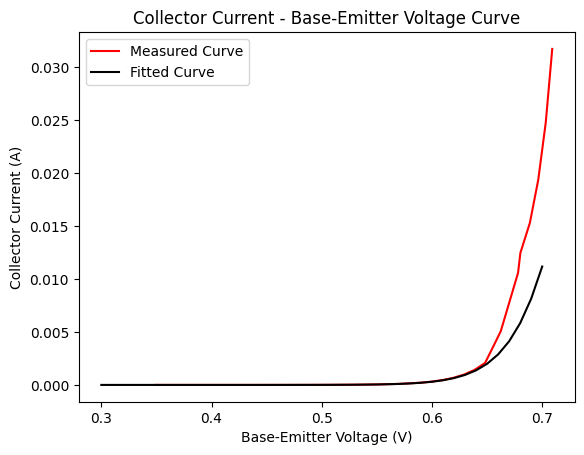

In [113]:
plt.plot(vbe, ic, label="Measured Curve", color="red")
plt.plot(vbe_simul, ic_simul, label="Fitted Curve", color="black")
plt.ylabel("Collector Current (A)")
plt.xlabel("Base-Emitter Voltage (V)")
plt.legend()
plt.title("Collector Current - Base-Emitter Voltage Curve")

Text(0.5, 1.0, 'Collector Current - Base Current Curve')

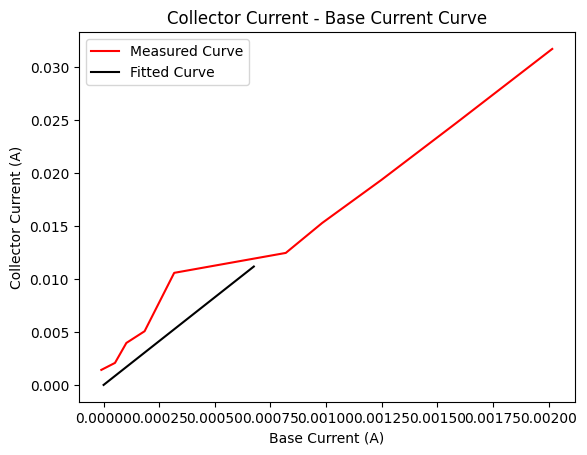

In [114]:
plt.plot(ib, ic_trunc_2, label="Measured Curve", color="red")
plt.plot(ib_simul, ic_simul, label="Fitted Curve", color="black")
plt.ylabel("Collector Current (A)")
plt.xlabel("Base Current (A)")
plt.legend()
plt.title("Collector Current - Base Current Curve")

Text(0.5, 1.0, 'Collector Current - Collector-Emitter Voltage Curve')

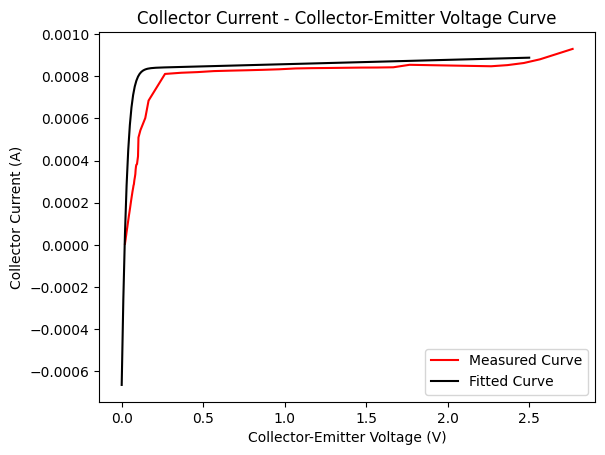

In [116]:
plt.plot(vce, ice, label="Measured Curve", color="red")
plt.plot(vce_simul, ice_simul, label="Fitted Curve", color="black")
plt.ylabel("Collector Current (A)")
plt.xlabel("Collector-Emitter Voltage (V)")
plt.legend()
plt.title("Collector Current - Collector-Emitter Voltage Curve")